# **Predict Employee Attrition**
---

# Import Library

In [65]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [67]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Employee-Attrition/main/Dataset/hr_employee_retention_dataset.csv'
df = pd.read_csv(link)

In [68]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
198,jumpySeahorse6,110876,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Indeed,3,5.0,5.0,0.0,8.0,+6281959858xxx,jumpySeahorse6149@gmail.com,Sarjana,1,NaN,NaN,1989-06-30,2017-4-20,2020-1-28,-
135,resolvedMoth3,111569,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Selatan,Diversity_Job_Fair,1,4.0,0.0,2.0,16.0,+6283203119xxx,resolvedMoth3943@yahoo.com,Sarjana,1,NaN,masih_bekerja,1984-08-16,2014-5-18,2020-1-16,-
177,solidEagle1,100762,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Bagus,Jakarta Utara,Other,4,3.0,2.0,0.0,3.0,+6283334899xxx,solidEagle1834@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-04-16,2009-01-05,2020-02-08,-
246,peacefulKitten4,101525,Lainnya,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Sangat_kurang,Jakarta Pusat,LinkedIn,3,3.0,5.0,0.0,2.0,+6283105380xxx,peacefulKitten4282@yahoo.com,Sarjana,yes,NaN,kejelasan_karir,1987-12-17,2015-01-05,2016-4-20,2017-11-15
154,emptyMussel0,106605,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Timur,LinkedIn,3,4.0,0.0,0.0,16.0,+6283349250xxx,emptyMussel0325@outlook.com,Doktor,1,NaN,masih_bekerja,1973-03-26,2013-5-13,2016-03-02,-


# Data Understanding

## Features Definition

| Nama Fitur                         | Deskripsi Fitur                                 |
|------------------------------------|-------------------------------------------------|
| Username                           | Username karyawan                               |
| EnterpriseID                       | Nomor induk karyawan                            |
| StatusPernikahan                   | Status pernikahan karyawan                      |
| JenisKelamin                       | Jenis kelamin karyawan                          |
| StatusKepegawaian                  | Status kepegawaian karyawan                     |
| Pekerjaan                          | Posisi pekerjaan karyawan                       |
| JenjangKarir                       | Tingkat karir karyawan                          |
| PerformancePegawai                 | Nilai kinerja karyawan                          |
| AsalDaerah                         | Asal daerah karyawan                            |
| HiringPlatform                     | Platform yang digunakan untuk merekrut karyawan |
| SkorSurveyEngagement               | Skor survei keterlibatan karyawan               |
| SkorKepuasanPegawai                | Skor kepuasan karyawan                          |
| JumlahKeikutsertaanProjek          | Jumlah proyek yang diikuti oleh karyawan        |
| JumlahKeterlambatanSebulanTerakhir | Jumlah keterlambatan bulanan terbaru karyawan   |
| JumlahKetidakhadiran               | Jumlah ketidakhadiran karyawan                  |
| NomorHP                            | Nomor ponsel karyawan                           |
| Email                              | Alamat email karyawan                           |
| TingkatPendidikan                  | Tingkat pendidikan karyawan                     |
| PernahBekerja                      | Pengalaman kerja karyawan                       |
| IkutProgramLOP                     | Partisipasi dalam program LOP                   |
| AlasanResign                       | Alasan pengunduran diri karyawan                |
| TanggalLahir                       | Tanggal lahir karyawan                          |
| TanggalHiring                      | Tanggal perekrutan karyawan                     |
| TanggalPenilaianKaryawan           | Tanggal penilaian kinerja karyawan              |
| TanggalResign                      | Tanggal pengunduran diri karyawan               |

## Dimensions of the DataFrame

In [69]:
df.shape

(287, 25)

In [70]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 287
Jumlah kolom: 25


## Data Types of the Features

In [71]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `EnterpriseID` hanya berisi identifikasi unik untuk setiap karyawan tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.

In [72]:
# Drop 'EnterpriseID' column
df.drop(columns=['EnterpriseID'], inplace=True)

# Data Exploration

## Exploratory Data Analysis

### Statistical Analysis

In [73]:
# Statistics for the columns (features)
df.describe(include='all')

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287.000000,282.000000,284.000000,286.000000,281.000000,287,287,287,287,29.000000,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,NaN,NaN,NaN,NaN,NaN,287,287,3,2,NaN,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,NaN,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,NaN,NaN,NaN,NaN,NaN,1,1,176,286,NaN,132,2,12,17,198
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.101045,3.904255,1.179577,0.412587,10.448399,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836388,0.913355,2.294441,1.275016,6.902252,NaN,NaN,NaN,NaN,0.508548,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,0.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [74]:
# Define features
num = df.select_dtypes(include=['float64', 'int64'])
cat = df.select_dtypes(include=['object'])

num_cols = num.columns
cat_cols = cat.columns

In [75]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 6
Jumlah fitur kategorikal: 18


### Univariate Analysis

#### Numerical Features

In [76]:
num.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


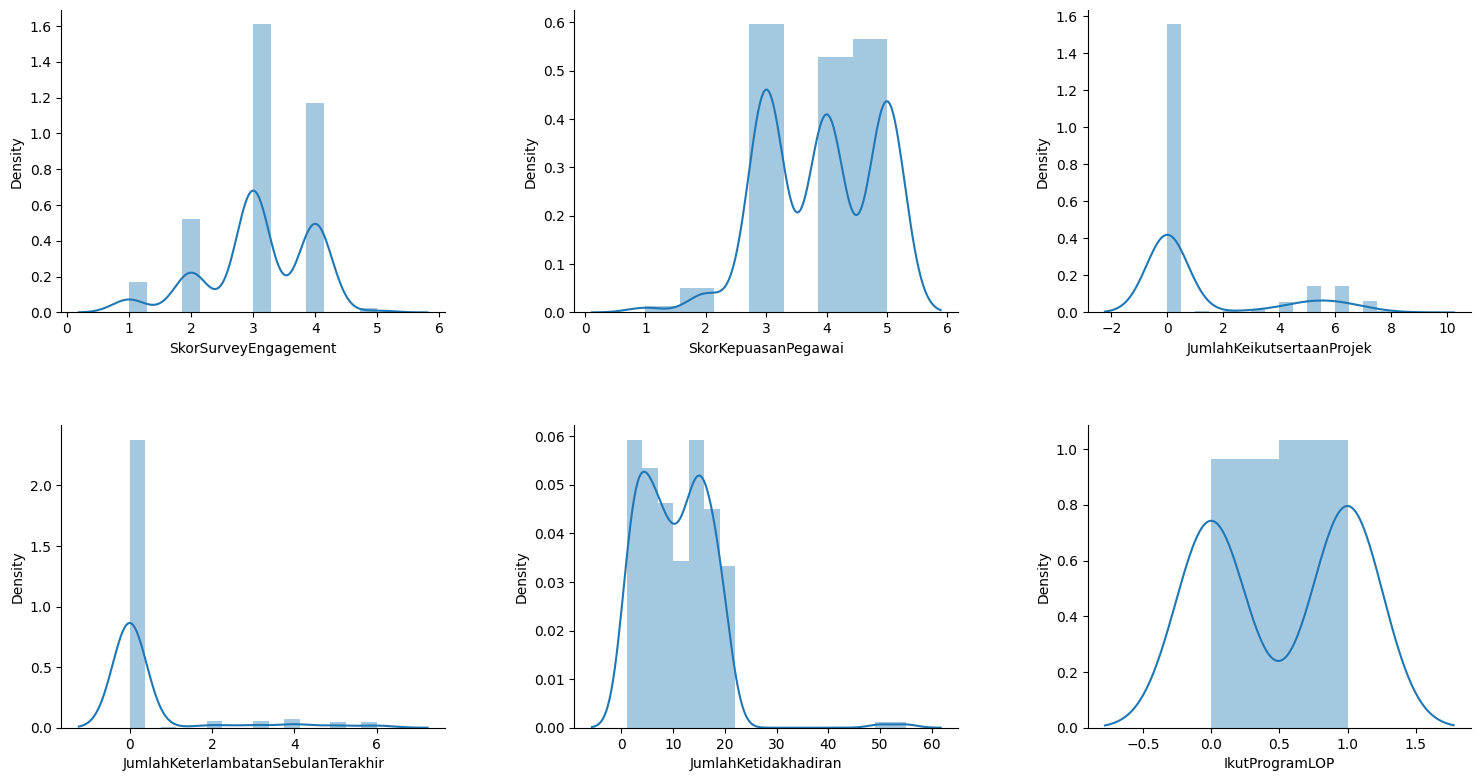

In [82]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[num_cols[i]])
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- XXX

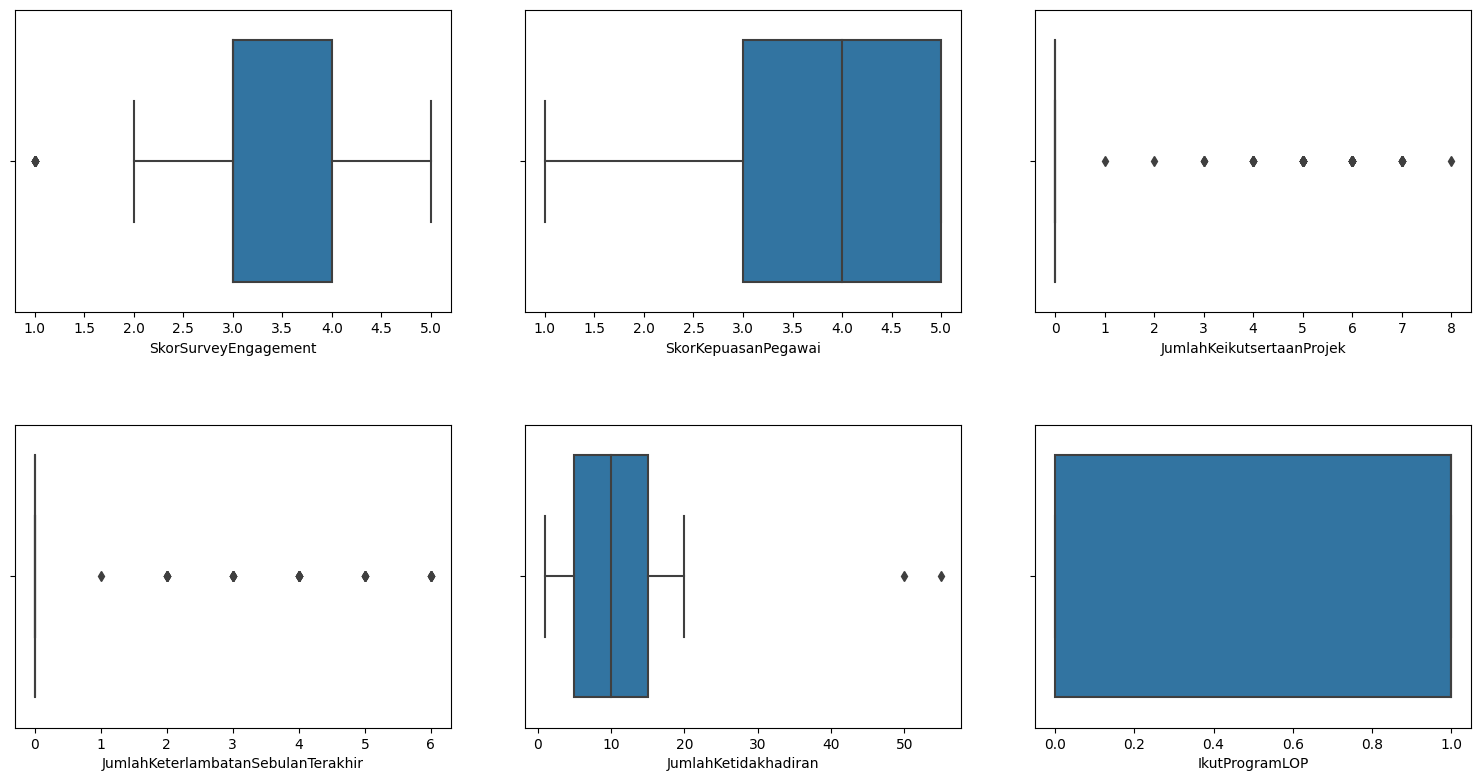

In [83]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.tight_layout(pad=5)

In [84]:
df.columns

Index(['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian',
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'NomorHP', 'Email', 'TingkatPendidikan',
       'PernahBekerja', 'IkutProgramLOP', 'AlasanResign', 'TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

🔎 Insights
- Fitur `SkorSurveyEngagement` dan `JumlahKetidakhadiran` memiliki beberapa _outliers_, sehingga kita akan menganalisis lebih lanjut.

🔽 `SkorSurveyEngagement`

In [90]:
df[df['SkorSurveyEngagement'] < 2]

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
11,grizzledSnipe7,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,1,5.0,0.0,5.0,2.0,+6289987666xxx,grizzledSnipe7992@outlook.com,Magister,1,NaN,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-9-19
19,guiltyMoth4,Lainnya,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Utara,Indeed,1,2.0,0.0,4.0,9.0,+6289723429xxx,guiltyMoth4337@icloud.com,Sarjana,1,NaN,masih_bekerja,1967-04-19,2014-07-07,2020-1-31,-
24,pluckyHoopoe3,Bercerai,Wanita,Outsource,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Timur,CareerBuilder,1,3.0,0.0,2.0,3.0,+6281251580xxx,pluckyHoopoe3654@yahoo.com,Sarjana,1,NaN,ganti_karir,1990-09-21,2011-04-04,2020-2-27,2016-04-04
32,giddyMallard9,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Kurang,Jakarta Pusat,Indeed,1,5.0,0.0,6.0,15.0,+6283300431xxx,giddyMallard9195@icloud.com,Magister,1,NaN,ganti_karir,1989-10-18,2015-05-11,2020-01-03,2016-08-02
44,shySyrup7,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Barat,LinkedIn,1,3.0,0.0,5.0,16.0,+6281238359xxx,shySyrup7423@yahoo.com,Magister,1,NaN,masih_bekerja,1979-08-12,2011-07-11,2017-05-01,-
64,mercifulSausage4,Lainnya,Wanita,FullTime,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Google_Search,1,3.0,0.0,0.0,6.0,+6283244035xxx,mercifulSausage4755@icloud.com,Sarjana,1,NaN,masih_bekerja,1973-09-23,2010-4-26,2020-1-21,-
98,forsakenWidgeon8,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_kurang,Jakarta Barat,Website,1,1.0,0.0,2.0,17.0,+6283347244xxx,forsakenWidgeon8050@proton.com,Sarjana,1,NaN,masih_bekerja,1987-05-14,2012-2-20,2020-1-29,-
133,sheepishWidgeon1,Belum_menikah,Wanita,Outsource,Software Engineer (iOS),Mid_level,Bagus,Jakarta Selatan,Diversity_Job_Fair,1,4.0,0.0,5.0,4.0,+6289832939xxx,sheepishWidgeon1917@outlook.com,Magister,1,NaN,masih_bekerja,1968-06-06,2016-07-04,2020-2-18,-
135,resolvedMoth3,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Selatan,Diversity_Job_Fair,1,4.0,0.0,2.0,16.0,+6283203119xxx,resolvedMoth3943@yahoo.com,Sarjana,1,NaN,masih_bekerja,1984-08-16,2014-5-18,2020-1-16,-
136,lovesickRhino0,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,1,3.0,6.0,3.0,2.0,+6287885203xxx,lovesickRhino0235@hotmail.com,Sarjana,1,NaN,tidak_bahagia,1987-06-18,2015-3-30,2020-02-04,2015-04-01


🔽 `JumlahKetidakhadiran`

In [91]:
df[df['JumlahKetidakhadiran'] > 40]

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
12,yearningBagels0,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,4,3.0,0.0,0.0,50.0,+6287794061xxx,yearningBagels0311@outlook.com,Magister,1,NaN,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,-
115,wingedLeopard7,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,4,5.0,0.0,0.0,55.0,+6289913280xxx,wingedLeopard7878@hotmail.com,Sarjana,1,NaN,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,-


#### Categorical Features

In [79]:
cat.describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


🔽 `StatusPernikahan`

In [80]:
df['StatusPernikahan'].value_counts(normalize=True)

StatusPernikahan
Belum_menikah    0.459930
Menikah          0.198606
Lainnya          0.167247
Bercerai         0.163763
-                0.010453
Name: proportion, dtype: float64

🔽 `JenisKelamin`

In [81]:
df['JenisKelamin'].value_counts(normalize=True)

JenisKelamin
Wanita    0.581882
Pria      0.418118
Name: proportion, dtype: float64

🔽 `StatusKepegawaian`

In [92]:
df['StatusKepegawaian'].value_counts(normalize=True)

StatusKepegawaian
FullTime      0.756098
Outsource     0.229965
Internship    0.013937
Name: proportion, dtype: float64

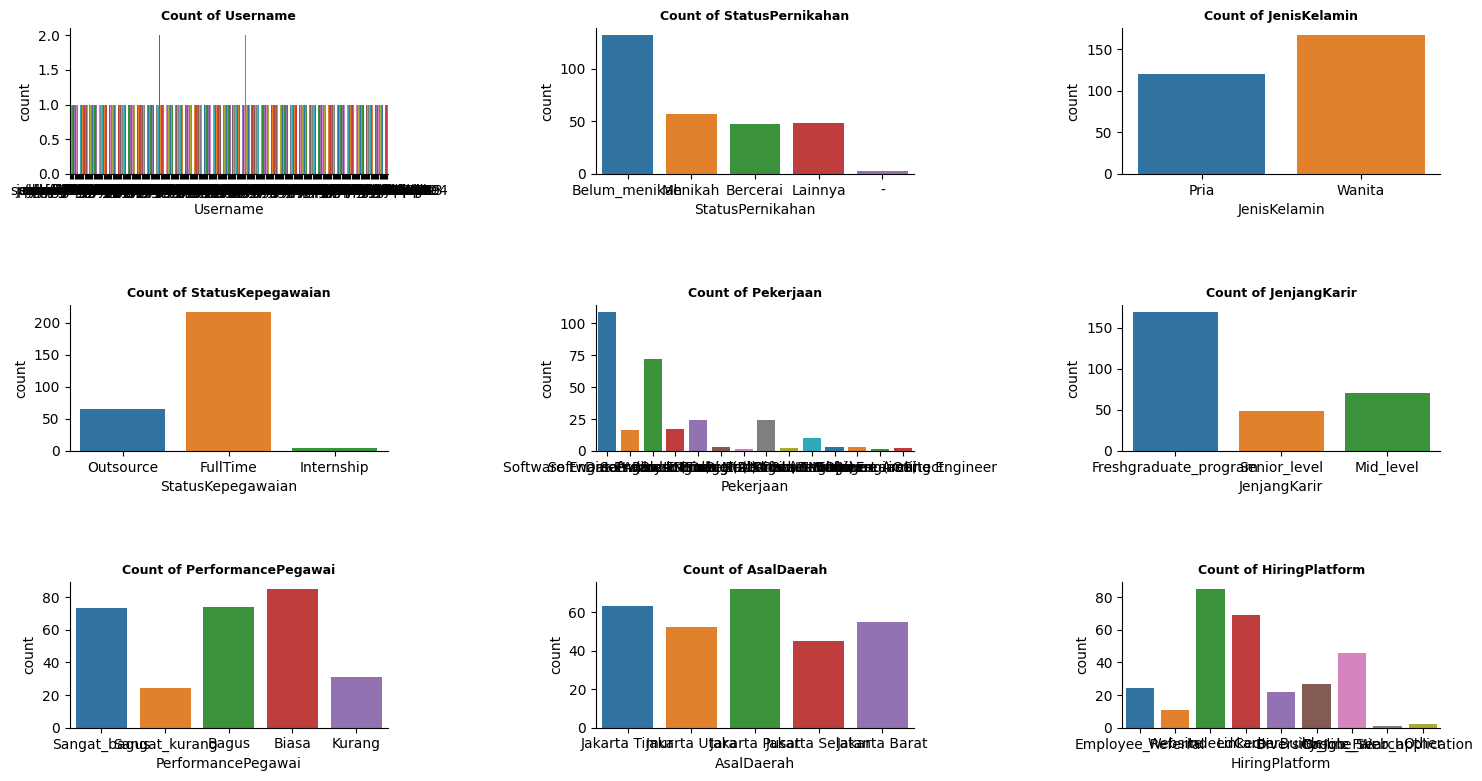

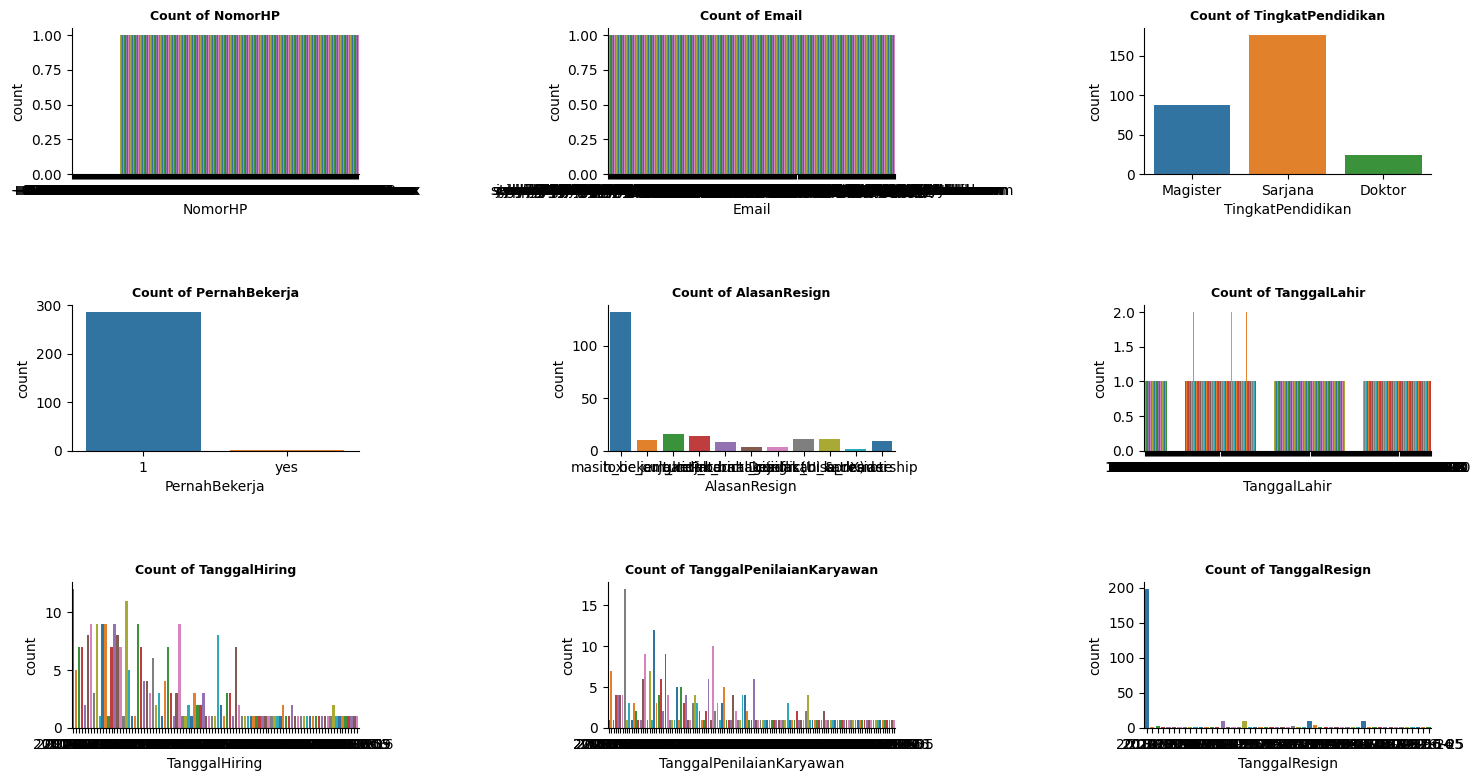

<Figure size 1600x900 with 0 Axes>

In [109]:
plt.figure(figsize=(16, 9))

# Subplot from index 0-8 and 9-17
for j in range(2):
    start_index = j * 9
    end_index = (j + 1) * 9
    for i in range(start_index, end_index):
        plt.subplot(3, 3, i % 9 + 1)
        ax = sns.countplot(x=df[cat_cols[i]], palette='tab10')
        plt.title(f'Count of {cat_cols[i]}', fontsize=9, weight='bold')
        sns.despine()
        plt.tight_layout(pad=5)

    plt.figure(figsize=(16, 9))

plt.show()